In [1]:
!pip install pycountry_convert

In [2]:
!pip install plotly

In [3]:
import warnings
import plotly.express as px
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None

In [5]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [6]:
country_vs_life = data.groupby('Country', as_index=False)['Life expectancy '].mean()

In [7]:
country_vs_life.sort_values(by='Life expectancy ', ascending=False).head(10)

Country  Life expectancy 
84         Japan          82.53750
165       Sweden          82.51875
75       Iceland          82.44375
166  Switzerland          82.33125
60        France          82.21875
82         Italy          82.18750
160        Spain          82.06875
7      Australia          81.81250
125       Norway          81.79375
30        Canada          81.68750

In [8]:
country_vs_life.sort_values(by='Life expectancy ', ascending=True).head(10)

Country  Life expectancy 
152              Sierra Leone          46.11250
31   Central African Republic          48.51250
94                    Lesotho          48.78125
3                      Angola          49.01875
100                    Malawi          49.89375
32                       Chad          50.38750
44              Côte d'Ivoire          50.38750
192                  Zimbabwe          50.48750
164                 Swaziland          51.32500
123                   Nigeria          51.35625

In [9]:
continents = {
    'NA' : 'North America',
    'SA' : 'South America',
    'AS' : 'Asia',
    'OC' : 'Australia',
    'AF' : 'Africa',
    'EU' : 'Europe'
}

continent = []
for country in data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append('Africa')

data['Continent'] = continent
to_bubble = data[["Country", "Year", "Life expectancy ", "GDP", "Population", "Continent"]]
to_bubble.dropna(inplace=True)

In [10]:
df = px.data.gapminder()
fig = px.scatter(to_bubble, x='GDP', y='Life expectancy ', size='Population', color="Continent", hover_name="Country", log_x=True, size_max=50)
fig.show()

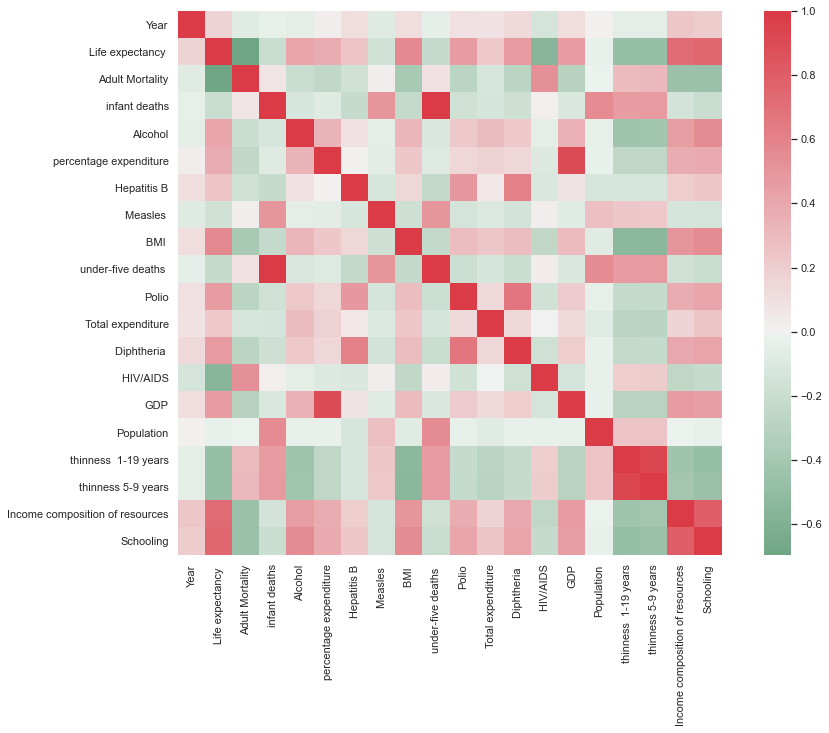

In [11]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap, center=0, annot=False, square=True)

In [12]:
! pip install --upgrade seaborn

Requirement already up-to-date: seaborn in c:\users\user\anaconda3\lib\site-packages (0.11.1)


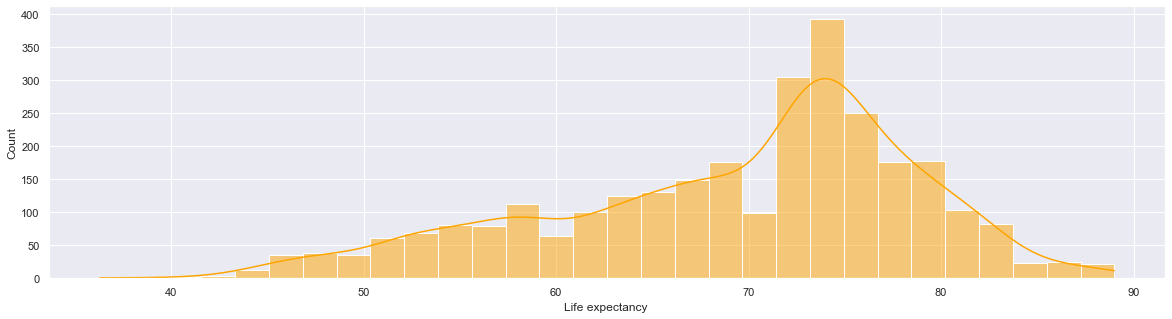

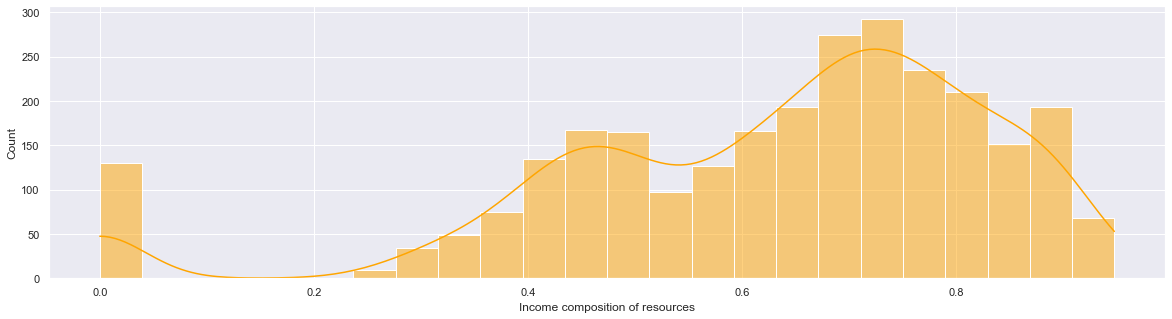

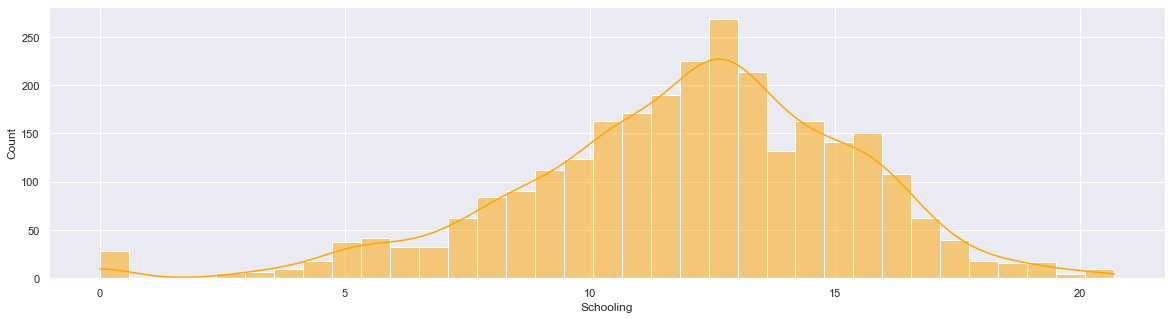

In [13]:
l = [data["Life expectancy "].dropna(), data["Income composition of resources"].dropna(), data["Schooling"].dropna()]
for i in l:
    plt.figure(figsize=(20, 5))
    sns.histplot(i, kde=True, color='orange')

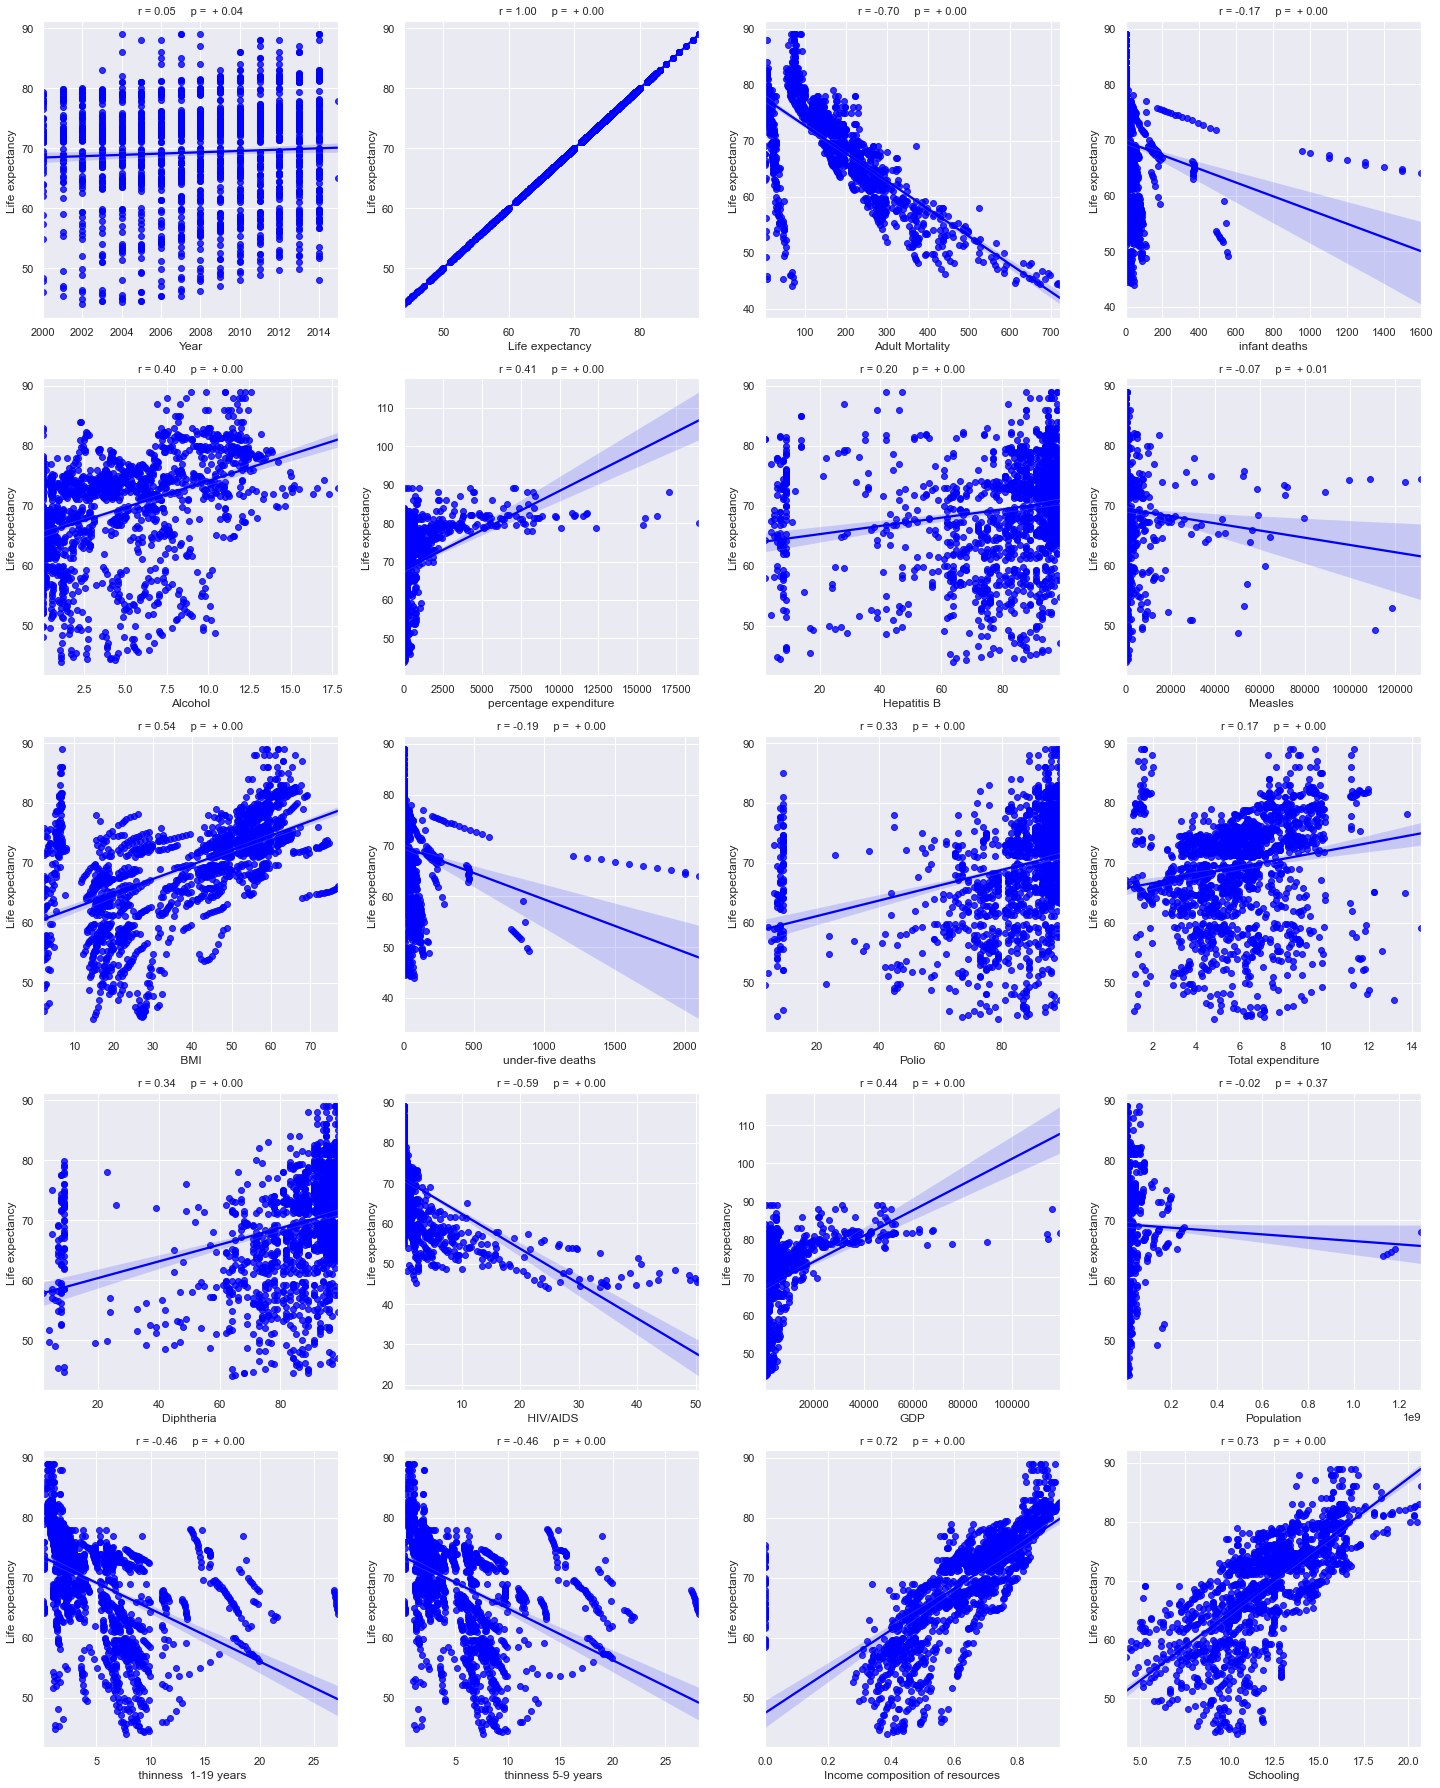

In [15]:
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5, nr_rows*5))
numerical_feats = data.dtypes[data.dtypes != "object"].index
li_num_feats = list(numerical_feats)
li_not_plot  = []
li_plot_num_feats = [c for c in list(numerical_feats) if c not in li_not_plot]
data.dropna(inplace =True)

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r*nr_cols + c
        if i < len(li_plot_num_feats):
            sns.regplot(x = data[li_plot_num_feats[i]], y = data["Life expectancy "], color="blue", ax=axs[r][c])
            stp = stats.pearsonr(data[li_plot_num_feats[i]], data["Life expectancy "])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "     " "p = "" + ""{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)
            
plt.tight_layout()
sns.set(color_codes=True)
plt.show()

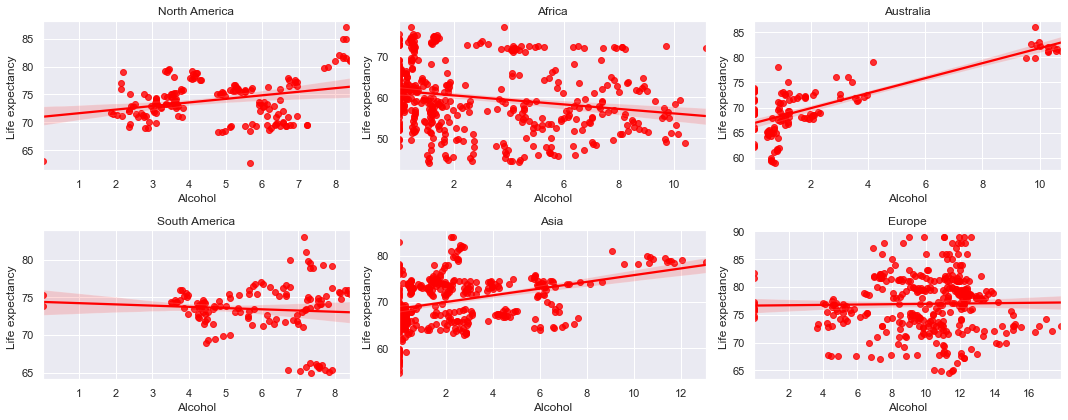

In [16]:
fig, axs = plt.subplots(2,3, figsize=(15,6), facecolor="w", edgecolor="k")
fig.subplots_adjust(hspace=0.5)

for conts, ax in zip(set(data["Continent"]), axs.flat):
    Conts = data[data['Continent']==conts]
    sns.regplot(x = Conts['Alcohol'], y = Conts['Life expectancy '], color="red", ax=ax).set_title(conts)
    
plt.tight_layout()
sns.set(color_codes=True)
plt.show()

In [17]:
target = data["Life expectancy "]
features = data[data.columns.difference(['Life expectancy '])]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use :\n')
pprint(rf.get_params())

Parameters currently in use :

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [20]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=4, stop=200, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [24]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [4, 25, 47, 69, 91, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [29]:
def evaluate(model,test_features,test_labels):
    predictions = model.predict(test_features)
    errors= abs(predictions - test_labels)
    mape = 100 *  np.mean(errors/test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy= {:0.2f}%. '.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor()
base_model.fit( X_test, Y_test)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.5813 degrees.
Accuracy= 99.12%. 
Model Performance
Average Error: 1.1881 degrees.
Accuracy= 98.23%. 
Improvement of -0.90%.


In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, None],
    'max_features': [2, 3, 4, 'auto'],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [1, 2, 4, 8],
    'n_estimators': [10, 30, 100, 120, 150]
}

grid_search = GridSearchCV(estimator = rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan ... 0.91254701 0.91271216 0.91238729]



GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, None],
                         'max_features': [2, 3, 4, 'auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 2, 4, 8],
                         'n_estimators': [10, 30, 100, 120, 150]},
             verbose=2)

In [32]:
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Model Performance
Average Error: 1.2116 degrees.
Accuracy= 98.19%. 
Improvement of -0.94%.


In [33]:
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

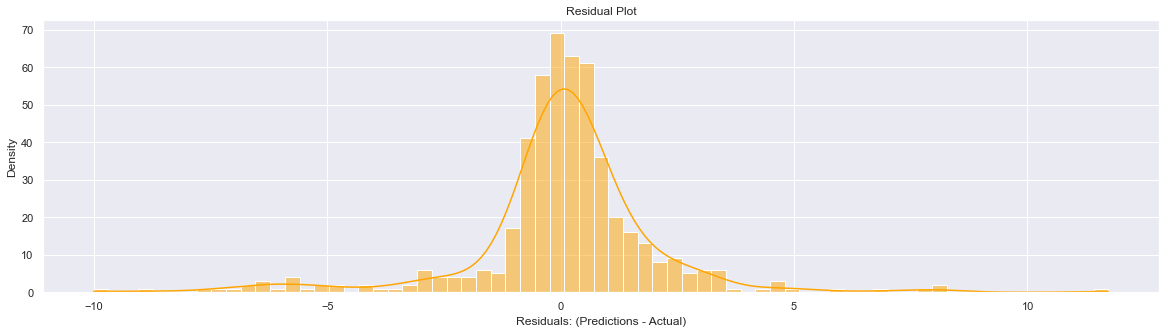

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True, color="orange")
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density');

In [35]:
from sklearn.metrics import r2_score
print("R-squared Score Obtained for predicting Life Expectancy is {0}".format(r2_score(Y_test, model_predictions)))

R-squared Score Obtained for predicting Life Expectancy is 0.9459247863222234


ne can extend his/her life span by adopting a healthy life-style, proper education, and by getting vaccinated. Ofcourse Demographic location plays an important role. In our analysis, we saw people living in Europe has a higher life-span as compared to other continents. Country's GDP and Income composition affects the Life Expectancy in a broader way.

There are some parameters like pollution and environmental index that has been missing in this analysis and expected to be highly related with Life Expectancy.

Getting Vaccinated for various diseases also increases the expected life span. Consumption of Alcohol and Life expectancy has an unexpected positive relation except for Africa.